In [12]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Given that J and N are fixed
J = 4  
N = 2000  

In [14]:
#Creating a multidimensional array to store the chains
x = np.zeros((J, N + 1))
x[0,0]=0
x[0,1]=1
x[0,2]=2
x[0,3]=3

In [15]:
#Defining the probability density function f(x)
def f(x):
    return 0.5*np.exp(-np.abs(x))

In [16]:
#Generating 100 evenly spaced s values in between 0.001 and 1
s_values=np.linspace(0.001,1,100)

In [17]:
#Defining a function to carry out step 2 of the Random walk Metropolis
def step_2(s, J, N, x, f):
    for j in range(J):
        for n in range(1, N + 1):
            x_star = np.random.normal(x[j, n - 1], s)
            r = f(x_star) / f(x[j, n - 1])
            u = np.random.uniform(0, 1)

            if np.log(u) < np.log(r):
                x[j, n] = x_star
            else:
                x[j, n] = x[j, n - 1]
    
    return x[:, 1:] 

In [18]:
#Defining a function to calulate R_hat
def calculate_R_hat(x):
    M_j = np.mean(x, axis=1)
    V_j = np.var(x, axis=1)
    W = np.mean(V_j)
    M = np.mean(M_j)
    B = np.mean((M_j - M) ** 2)
    
    R_hat = np.sqrt((B + W) / W)
    
    return R_hat


In [19]:
#Calculating R_hat for each s value
R_hat_for_s = []
for s in s_values:
    generated_x = step_2(s, J, N, x.copy(), f)
    R_hat = calculate_R_hat(generated_x)
    R_hat_for_s.append(R_hat)

Text(0, 0.5, 'R_hat values')

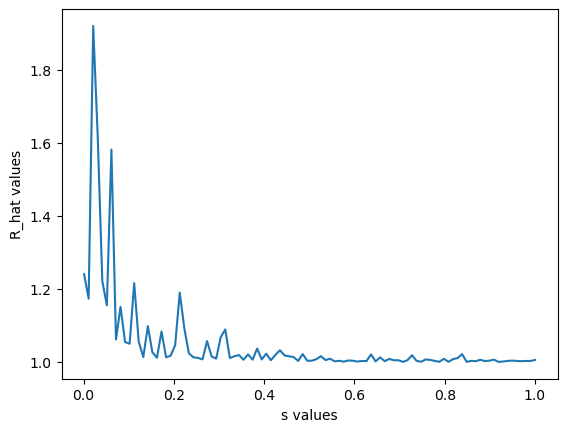

In [21]:
# Print the R_hat values for each s
plt.plot(s_values,R_hat_for_s)
plt.xlabel('s values')
plt.ylabel('R_hat values')

In [25]:
#Calculating R_hat when s=0.001
x_sample = np.zeros((J, N + 1))
x[0,0]=0
x[0,1]=1
x[0,2]=2
x[0,3]=3
generated_x_sample = step_2(0.001, 4, 2000, x_sample, f)
R_hat_sample = calculate_R_hat(generated_x_sample)
print('R hat value when s is 0.001=', R_hat_sample )

R hat value when s is 0.001= 1.1253074725715657
